In [1]:
import os
import sys

import matplotlib.pyplot as plt
from kmeans import parallelKMeans
from pyspark import SparkContext
from read import parallelReadFile


def plot_centroids(centroids, image_size=(28, 28)):
    """
    Plot each centroid as an image.

    :param centroids: numpy array, centroids with each row representing a centroid.
    :param image_size: tuple, the (height, width) of the images represented by the centroids.
    """
    for i, centroid in enumerate(centroids):
        # Reshape the centroid to the original image dimensions
        image = centroid.reshape(image_size)

        # Plot the image
        plt.figure()
        plt.imshow(image, cmap="gray")
        plt.title(f"Centroid {i+1}")
        plt.show()

23/12/06 20:21:21 WARN Utils: Your hostname, MacBook-Pro-di-Luca.local resolves to a loopback address: 127.0.0.1; using 192.168.1.160 instead (on interface en0)
23/12/06 20:21:21 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/06 20:21:22 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


23/12/06 20:21:26 WARN BlockManager: Task 0 already completed, not releasing lock for rdd_2_0


Iteration:  0


Iteration:  1


23/12/06 20:21:34 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


Iteration:  2


Iteration:  3


Iteration:  4


Iteration:  5


Iteration:  6


Iteration:  7


Iteration:  8


Iteration:  9


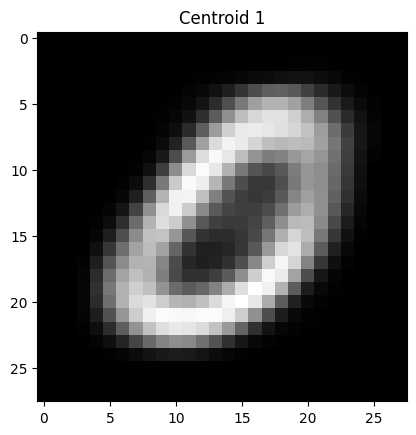

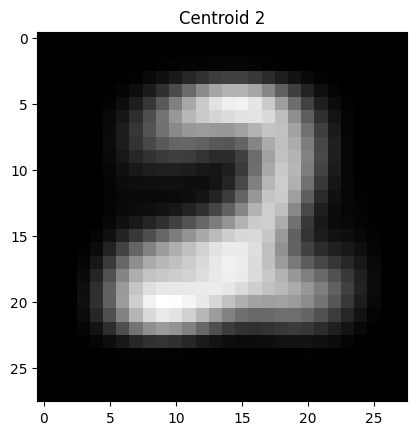

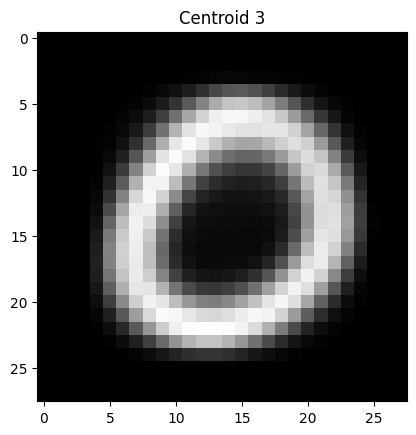

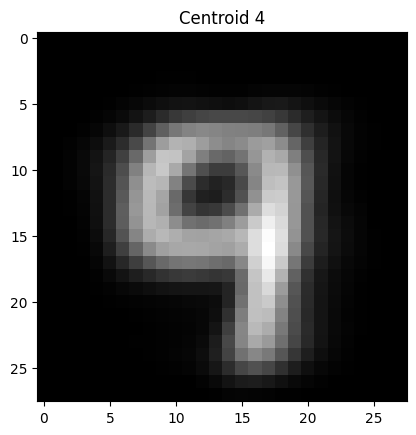

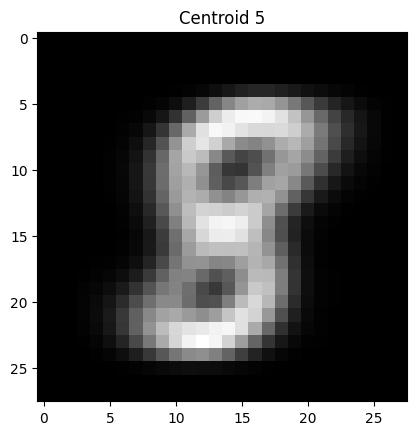

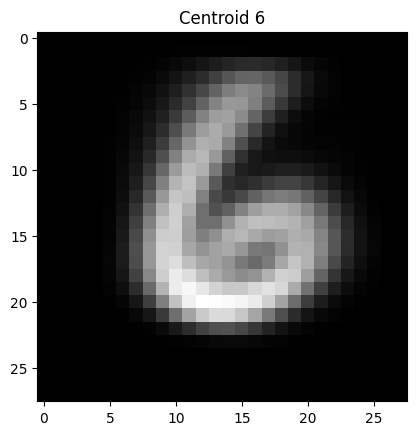

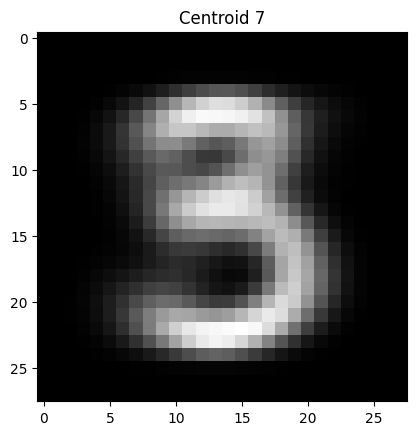

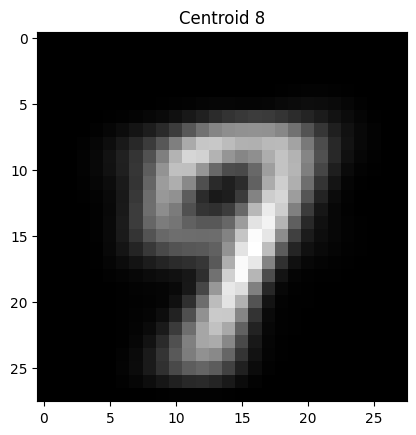

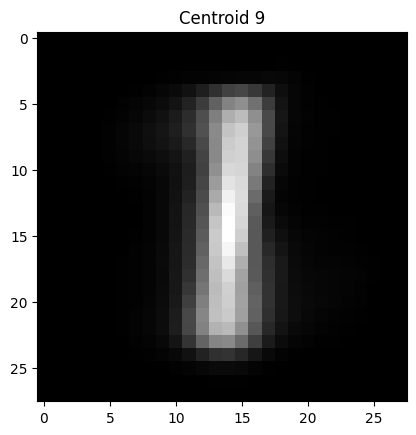

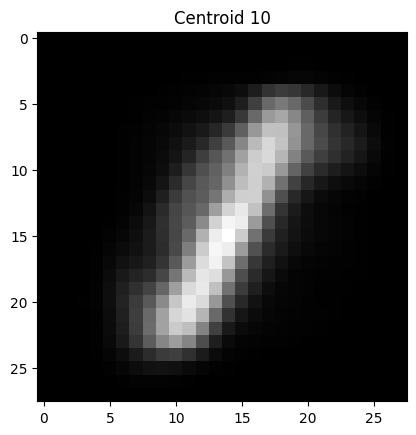

In [2]:
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

sc = SparkContext.getOrCreate()
current_directory = os.getcwd()
sc.addPyFile(current_directory + "/read.py")
sc.addPyFile(current_directory + "/kmeans.py")
# read data
data = parallelReadFile("/Users/lucapetracca/Documents/GitHub/Massively-Parallel-ML/mnist/data/tot_mnist_shuf.csv")
data_cache = data.cache()
centroids = parallelKMeans(data_cache, 10, 10)
plot_centroids(centroids)